In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

In [24]:
path = pathlib.Path('/Users/singhalmanik/Code/Datasets/keras-multi-label/dataset/')
path

PosixPath('/Users/singhalmanik/Code/Datasets/keras-multi-label/dataset')

In [42]:
#labels for path
def labelList(path):
    #print(path)
    comp = path.parts
    return comp[-2].split('_')

In [43]:

np.random.seed(42)
src = (ImageItemList.from_folder(path, extensions=['.jpg', '.jpeg', '.png'])
      .random_split_by_pct(0.2)
        .label_from_func(func = labelList)
      )
src

LabelLists;

Train: LabelList
y: MultiCategoryList (1732 items)
[MultiCategory red;dress, MultiCategory red;dress, MultiCategory red;dress, MultiCategory red;dress, MultiCategory red;dress]...
Path: /Users/singhalmanik/Code/Datasets/keras-multi-label/dataset
x: ImageItemList (1732 items)
[Image (3, 2796, 1945), Image (3, 1080, 810), Image (3, 1080, 810), Image (3, 1666, 1000), Image (3, 1666, 1000)]...
Path: /Users/singhalmanik/Code/Datasets/keras-multi-label/dataset;

Valid: LabelList
y: MultiCategoryList (433 items)
[MultiCategory black;jeans, MultiCategory black;jeans, MultiCategory black;jeans, MultiCategory red;shirt, MultiCategory black;jeans]...
Path: /Users/singhalmanik/Code/Datasets/keras-multi-label/dataset
x: ImageItemList (433 items)
[Image (3, 1380, 920), Image (3, 2667, 2000), Image (3, 2240, 1920), Image (3, 1338, 1100), Image (3, 1425, 1425)]...
Path: /Users/singhalmanik/Code/Datasets/keras-multi-label/dataset;

Test: None

In [47]:
tfms = get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
bs = 32

In [48]:
data = (src.transform(tfms, size=128)
        .databunch(bs=bs).normalize(imagenet_stats)
       )

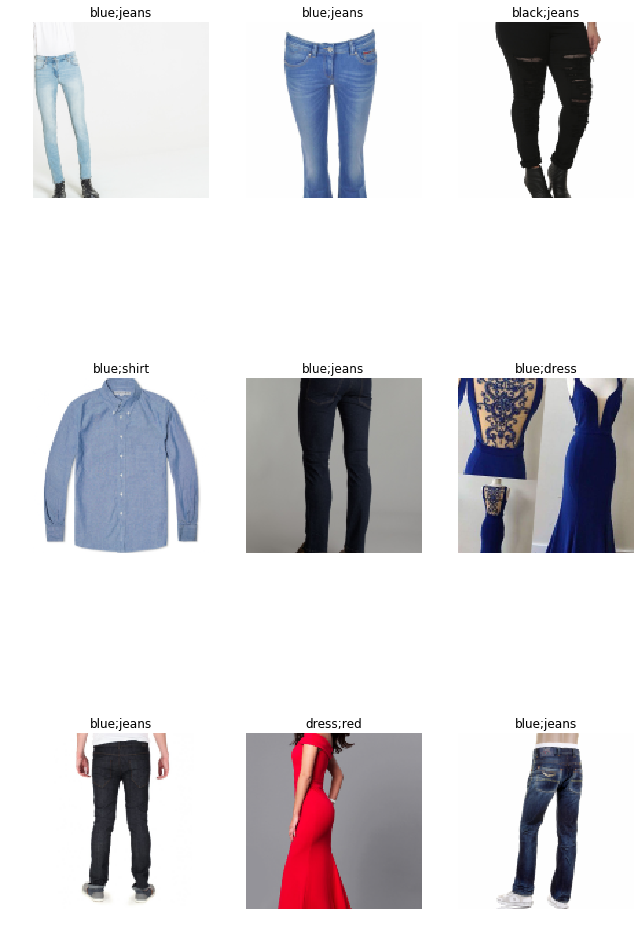

In [46]:
data.show_batch(3, figsize=(9,16))

In [50]:
arch = models.resnet34

In [51]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
learner = create_cnn(data, arch, metrics=acc_02)

In [52]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


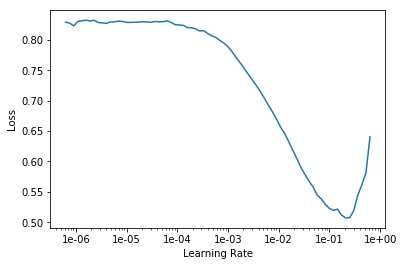

In [53]:
learner.recorder.plot()

In [54]:
lr = 0.01

In [ ]:
learner.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh
1,0.321301,0.060895,0.965743
